# Finite element methods: basic concepts 

This notebook is based on Chapter 0  of 

<a id="thebook"></a>
> Brenner, Susanne C. and Scott, L. Ridgway. _The mathematical theory of finite element methods_. Springer, New York, 2008. <https://doi.org/10.1007/978-0-387-75934-0> (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9934192676506253))

The finite element method is a widely used method for numerically solving differential equations arising in engineering and mathematical modeling. There are many commercial (e.g. [Comsol](https://en.wikipedia.org/wiki/COMSOL_Multiphysics)) and open-source (e.g. [Fenics](https://en.wikipedia.org/wiki/FEniCS_Project))  software packages implementing sophisticated versions of the method. The method is very flexible, and it can be used to solve systems of equations describing many physical phenomena, see for example this [video](https://www.comsol.com/video/joule-heating-fuse-circuit-board-chapter-1) on modeling of resistive heating in an aluminum fuse using Comsol. Rather than applying the method to complicated models, using complex and often opaque software, we will focus on the mathematics underpinning the method and use a nimble and transparent Python library [Scikit-fem](https://scikit-fem.readthedocs.io/en/latest/).

# Linear spaces of functions

Let $a < b$ and write $F(a,b)$ for the set of functions $u : [a,b] \to \mathbb R$. Then $F(a,b)$ is a [vector space](https://en.wikipedia.org/wiki/Vector_space#Notation_and_definition) with respect to the usual pointwise addition and scalar muliplication

$$
+ : F(a,b) \times F(a,b) \to F(a,b), \quad \cdot : \mathbb R \times F(a,b) \to F(a,b),
$$

defined for $u,v \in F(a,b)$ and $c \in \mathbb R$ by

$$
(u + v)(x) = u(x) + v(x), \quad (cu)(x) = cu(x), \qquad x \in [a,b].
$$

Indeed, it is easy to verify that the required 8 axioms are satisfied. For example, _associativity of vector addition_ holds since for all $u,v,w \in F(a,b)$ there holds

$$
(u + (v + w))(x) = u(x) + (v+w)(x) = u(x) + v(x) + w(x) = ((u + v) + w)(x).
$$

The other axioms follow from the properties of real numbers in a similar manner.

## Definition: space of continuous functions
>
>$$
C(a,b) = \{ u \in F(a,b) : \text{$u$ is continuous on $[a,b]$}\}.
$$

We see that $C(a,b)$ is a subspace of $F(a,b)$. Indeed, the sum and product of two continuous functions are continuous, and thus $C(a,b)$ is closed under addition and scalar multiplication. 

## Definition: spaces of differentiable functions
>
>$$
C^k(a,b) = \{ u \in C(a,b) : u' \in C(a,b), \dots, u^{(k)} \in C(a,b)\}, \quad k = 1,2,\dots.
$$

It is easy to see that $C^k(a,b)$ is a subspace of $C(a,b)$. We also write $C^0(a,b) = C(a,b)$.

## Definition: space of square integrable functions
>
>$$
L^2(a,b) = \{u \in F(a,b) : \int_a^b |u(x)|^2 dx < \infty \}.
$$

This vector space can be made an [inner product space](https://en.wikipedia.org/wiki/Inner_product_space) by equipping it with the inner product 

$$
(u, v) = \int_a^b u(x) v(x) dx, \quad (\cdot, \cdot) : L^2(a,b) \times L^2(a,b) \to \mathbb R.
$$

To get a very nice space, [Lebesgue integration](https://en.wikipedia.org/wiki/Lebesgue_integration) should be used. We will get back to this later.

## Definition: spaces of polynomials  
>
>$$
\mathbb P_n(a, b) = \{p \in F(a,b) : \text{$p$ is a polynomial of degree $\le n$}\}, \quad n = 0, 1, \dots.
$$

We can show that 

$$
1, x, x^2, \dots, x^n
$$

is a basis of $\mathbb P_n(a, b)$. Thus $\mathbb P_n(a, b)$ is a finite dimensional space of functions. 

Let $k=0,1,\dots$. As $\mathbb P_n(a,b) \subset C^k(a,b)$
for any $n$, we see that $C^k(a,b)$ is infinite dimensional,
and so are $L^2(a,b)$ and $F(a,b)$ due to 

$$
C^k(a,b) \subset L^2(a,b) \subset F(a,b).
$$

# Inner product spaces

Let $V$ be an inner product space and write $(\cdot, \cdot)$ for the inner product on $V$ and $\|\cdot\|$ for the norm induced by the inner product.

## Lemma: Cauchy-Schwarz inequality
>$$
(u, v) \le \|u\| \|v\| \quad u,v \in V.
$$

## Lemma: orthogonality implies minimality
> Let $u \in V$ and let $S \subset V$ be a subspace. Suppose that $s \in S$ satisfies
>
>\begin{align*}
(u - s, v) = 0 \quad \text{for all $v \in S$}.
\end{align*}
>
> Then $\| u - s \| = \min_{v \in S} \| u - v \|$.

_Proof_. If $u = s$ then both the sides of the claimed equality are zero.
Suppose now that $u \ne s$. Let $v \in S$. Then $v -s \in S$ implies

\begin{align*}
\| u - s \|^2 
&= 
(u - s, u - s) 
= 
(u - s, u - v) + (u - s, v - s)
= 
(u - s, u - v) 
\\&\le 
\| u - s \| \| u - v \|.
\end{align*}

We may divide by $\| u - s \|$ as $u \ne s$. As $v \in S$ is arbitrary, the claim follows. $\blacksquare$

## Example: minimal distance between point and plane

Consider the case that $V = \mathbb R^3$ and $S$ is the plane spanned by the vectors

$$
b_0 = (1,1,0), \quad b_1 = (1,0,1).
$$

Let $u = (0,0,1)$ and let us find the closest point $s \in S$ to $u$. 
There are $c_0, c_1 \in \mathbb R$ such that  

$$
s = c_0 b_0 + c_1 b_1 = B c,
$$

where $B$ is the matrix with columns $b_0$ and $b_1$ and $c$ is the vector with entries $c_0$ and $c_1$. Perhaps the most natural way to find the closest point is to solve the least squares problem to minimize $|Bc - u|^2$.

In [1]:
import numpy as np
from scipy import linalg as la

In [2]:
u = np.array([0, 0, 1], dtype=float)
b0 = np.array([1, 1, 0], dtype=float)
b1 = np.array([1, 0, 1], dtype=float)
B = np.stack((b0, b1), axis=-1)
c, _, _, _ = la.lstsq(B, u) 
s = B @ c

print(f'{s = }')

s = array([ 0.33333333, -0.33333333,  0.66666667])


In [3]:
from matplotlib import pyplot as plt

In [4]:
def plot_vec(v, *args, o=np.zeros(3)):
    '''Plot vector v with base point at o'''
    w = v + o
    plt.gca().plot([w[0], o[0]], [w[1], o[1]], [w[2], o[2]], *args)

def plot_plane(v, w, ts, rs):
    ''''Plot the piece of plane t*v + r*w with t in ts and r in rs'''
    [Ts, Rs] = np.meshgrid(ts, rs)
    Xs = v[0] * Ts + w[0] * Rs
    Ys = v[1] * Ts + w[1] * Rs
    Zs = v[2] * Ts + w[2] * Rs
    plt.gca().plot_surface(Xs, Ys, Zs, alpha=0.5);

def set_equal_aspect():
    '''Set equal aspect ratio in all dimensions'''
    ax3d = plt.gca()
    wl = ax3d.get_w_lims()
    ax3d.set_box_aspect((wl[1]-wl[0],wl[3]-wl[2],wl[5]-wl[4]))  
    
def hide_ticks():
    '''Prettify plot by hiding the ticks in all axes'''
    ax3d = plt.gca()
    ax3d.set_xticks([])
    ax3d.set_yticks([])
    ax3d.set_zticks([])

# Try to scale the vectors b_j and scalars c_j 
# so that the picture looks nice 
b_scale = 0.5*np.min(np.abs(c))
c_scale = 1+3*b_scale

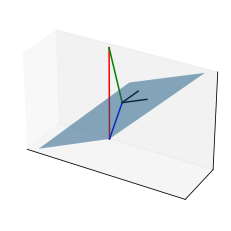

In [5]:
plt.axes(projection='3d')
plot_vec(u, 'r')
plot_vec(s, 'b')
plot_vec(u - s, 'g', o=s)
ts = [0, c_scale*c[0]]
rs = [0, c_scale*c[1]]
plot_plane(b0, b1, ts, rs)
plot_vec(b_scale*b0, 'k', o=s)
plot_vec(b_scale*b1, 'k', o=s)
# Prettify
set_equal_aspect()
hide_ticks()

The finite element method leads to problems that are similar to the above distance minimization, but $V$ will then be an infinite dimensional vector space and the corresponding least squares problem can not be solved directly. However, $S$ will still be finite dimensional, and we will be able to form a finite square system of linear equations. As a predule, let's demonstrate this idea in the context of the above distance minimization.

By the _orthogonality implies minimality_ lemma, the closest point $s$ is characterized by 

\begin{align}\tag{1}
(s,v) = (u, v) \quad \text{for all $v \in S$}.
\end{align}

In particular, equation (1) needs to hold for $v=b_0$ and $v=b_1$.
On the other hand, if (1) holds for $v=b_0$ and $v=b_1$ then it holds for all $v \in S$ by taking linear combinations. Writing again $s = c_0 b_0 + c_1 b_1$, we get the following system of equations for vector $c$ with entries $c_0$ and $c_1$

$$
\sum_{j=0}^1 c_j (b_j, b_i) = (u, b_i), \quad i=0,1.
$$

We write $K$ for the matrix with entries $(b_i, b_j)$ and $F$ for the vector with entries $(u, b_i)$. Then (1) is equivalent with $Kc = F$.

In [6]:
# Assemble matrix K
K = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        K[i,j] = np.dot(B[:,i], B[:,j])
# Assemble vector F
F = np.zeros(2)
for i in range(2):
    F[i] = np.dot(u, B[:,i])
c_alt = la.solve(K, F)
# Compare to the solution using least squares
eps = np.finfo(float).eps # Machine epsilon
la.norm(c_alt - c) < eps

True

# A boundary value problem

Let $f \in C(0,1)$ and $u \in C^2(0,1)$ solve the boundary value problem 

\begin{align}\tag{1}
\begin{cases}
-u'' = f & \text{on $(0,1)$},
\\
u(0) = 0 = u(1).
\end{cases}\end{align}

This is the one dimensional version of [Poisson's equation](https://en.wikipedia.org/wiki/Poisson's_equation). Define the linear space

$$
\mathcal V = \{ v \in C^1(0,1) : v(0) = v(1) = 0 \},
$$

and let $v \in \mathcal V$. Then, writing $(\cdot, \cdot)$ for the inner product on $L^2(0,1)$, integration by parts gives $-(u'', v) = (u', v')$. To summarize, (1) implies

\begin{align}\tag{2}
(u', v') = (f, v) \quad \text{for all $v \in \mathcal V$}. 
\end{align}

The opposite holds as well, that is, (2) implies (1) for $u \in C^2(0,1)$.
For an elementary proof, see Theorem 0.1.4 of [the book](#thebook).
We could call (2) a weak formulation of (1), but we will reserve this term for a modification of (2) where $\mathcal V$ is replaced by a slightly different vector space.  


The bilinear form

$$
a(u, v) = (u', v'), \quad a : \mathcal V \times \mathcal V \to \mathbb R
$$

gives an inner product on $\mathcal V$. Indeed, $a(u,u) \ge 0$ for $u \in \mathcal V$, and if $a(u,u) = 0$ then $u'(x) = 0$ for all $x \in [0,1]$.
As $u(0) = 0$, it follows that $u(x) = 0$ for all $x \in [0,1]$.

# Galerkin method

Galerkin method converts a continuous problem, commonly a weak formulation of a partial differential equation, to a discrete problem by applying linear constraints determined by finite sets of basis functions.

## Theorem: Galerkin solution
> Let $S \subset V$ be two vector spaces.
> Suppose that $a$ is an inner product on $V$ and that $S$ is finite dimensional. 
> Let $L : V \to \mathbb R$ be linear. Then there is unique $u_S \in S$ such that 
>
>$$
a(u_S,v) = L(v) \quad \text{for all $v \in S$}.
$$

We call $u_S$ the Galerkin solution.

_Proof_. 
Let $\phi_j$, $j=1,\dots,n$, be a basis of $S$, and write

$$
u_S = \sum_{j=1}^n U_j \phi_j, 
\quad
K_{ij} = a(\phi_i, \phi_j),
\quad
F_i = L(\phi_i), 
\qquad i,j=1,\dots,n.
$$

Moreover, write $U$ and $F$ for the vectors with elements $U_i$ and $F_i$, and $K$ for the matrix with elements $K_{ij}$. Then

$$
a(u_S,v) = L(v) \quad \text{for all $v \in S$}.
$$

is equivalent to $KU = F$. This is a square system of linear equations and existence and uniqueness of a solution $U$ are equivalent. So it is enough to show that $KU = 0$ implies $U = 0$. But $KU = 0$ is equivalent to $a(u_S, u_S) = 0$, and this again implies that $u_S = 0$ since $a$ is an inner product.
$\blacksquare$

## Lemma: Galerkin orthogonality
>Let $S \subset V$, $a$, and $L$ be as in the previous theorem. Suppose that $u \in V$ satisfies
>
>\begin{align*}
a(u, v) = L(v) \quad \text{for all $v \in V$}.
\end{align*}
>
> Then the Galerkin solution $u_S  \in S$ satisfies
>
>$$
a(u-u_S,v) = 0 \quad \text{for all $v \in S$}.
$$

_Proof_. Simply compute

$$
a(u-u_S,v) = a(u, v) - a(u_S, v) = L(v) - L(v) = 0.\ \blacksquare
$$


We write $\|u\|_E = \sqrt{a(u,u)}$ for the norm induced by the inner product $a$.
Galerkin orthogonality implies the minimality:

## Corollary: abstract error estimate
>Let $S \subset V$, $a$, and $u$ be as in the previous lemma. 
> Then the Galerkin solution $u_S \in S$ satisfies
>
>$$
\|u-u_S\|_E = \min_{v \in S} \|u - v\|_E.
$$


# Linear interpolating splines

Recall that linear interpolation was studied in [Computational methods 1](https://github.com/uh-comp-methods1/notebooks/blob/main/interpolation/lecture.ipynb).

Let $n \ge 1$ be an integer, and let 

$$
0 = x_0 < x_1 < \dots < x_n = 1.
$$ 

The _linear spline_ interpolating a function $u \in C(0,1)$ is 

$$
u_I(x) = \frac{x - x_{i-1}}{x_i - x_{i-1}} u(x_i) + \frac{x_{i} - x}{x_i - x_{i-1}} u(x_{i-1}), \qquad x \in [x_{i-1}, x_i], \quad i = 1,\dots,n.
$$

We see that $u_I(x_i) = u(x_i)$ for all $i=0,\dots,n$, $u_I$ is continuous, and that $u_I$ a polynomial of first order on each subinterval. 

We write $\|u\|_{L^\infty(a,b)} = \sup_{x \in [a,b]} |u(x)|$ for $a < b$.

## Theorem: linear interpolation error
>Let $u \in C^2(0,1)$ and let $u_I$ be the linear spline interpolating $u$ at 
>
>\begin{align*}
0 = x_0 < x_1 < \dots < x_n = 1.
\end{align*}
>
>Write $h = \max_{i=1,\dots,n} |x_i - x_{i-1}|$. Then 
>
>\begin{align*}
\|u - u_I\|_{L^\infty(0,1)} \le \frac18 \|(h \partial)^2 u\|_{L^\infty(0,1)}.
\end{align*}


Moreover, it follows from the _error in differentiation theorem_ that there is $C > 0$ independent of $u$ and $h$ such that

$$
\max_{i=1,\dots,n}\|(h\partial)(u - u_I)\|_{L^\infty(x_{i-1}, x_i)} \le C \|(h \partial)^2 u\|_{L^\infty(0,1)}.
$$

# P1 finite element

## Definition: P1 basis functions on reference domain 
>
>$$
\psi_0(x) 
= \begin{cases}
1 - x & x \in [0,1]
\\
0 & \text{otherwise},
\end{cases} 
\qquad
\psi_1(x) 
= \begin{cases}
x & x \in [0,1]
\\
0 & \text{otherwise}.
\end{cases}  
$$

Here the reference domain means the unit interval $[0,1]$.
Viewing $\psi_0$ and $\psi_1$ as functions on $[0,1]$, they form a basis of $\mathbb P_1(0,1)$.
Indeed, the standard basis of $\mathbb P_1(0,1)$ is obtained as 

$$
1 = \psi_0(x) + \psi_1(x), \quad x = \psi_1(x).
$$


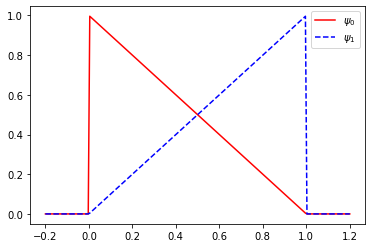

In [7]:
def cutoff(x):
    return (x > 0) * (x < 1)

def psi0(x):
    return cutoff(x) * (1 - x)
def psi1(x):
    return cutoff(x) * x

xs_plot = np.linspace(-0.2,1.2, 200)
plt.plot(xs_plot, psi0(xs_plot), 'r', label='$\psi_0$')
plt.plot(xs_plot, psi1(xs_plot), 'b--', label='$\psi_1$')
plt.legend();

## Definition: local basis functions
>Let 
>
>\begin{align*}
0 = x_0 < x_1 < \dots < x_n = 1,
\end{align*}
>
> write $I_e = [x_{e-1}, x_e]$, $e=1,\dots,n$, and consider the affine function
>
>\begin{align*}
\Phi_e : \mathbb R \to \mathbb R, \quad \Phi_e(x) = \frac{x - x_{e-1}}{x_e - x_{e-1}},
\end{align*}
>
> mapping $I_e$ to $[0,1]$. The local basis functions on $I_e$ are
>
>\begin{align*}
\psi_{j,e}(x) = \psi_j (\Phi_e (x)), \quad j = 0,1.
\end{align*}

The linear spline $u_I$ can be written on $I_e$ as 

$$
u_I(x) = u(x_{e-1}) \psi_{0,e}(x) + u(x_{e}) \psi_{1,e}(x).
$$

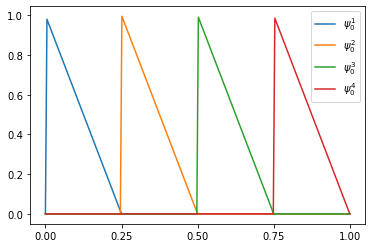

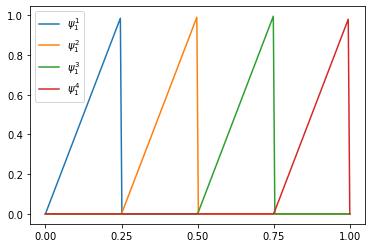

In [8]:
n = 4
xs = np.linspace(0,1, n+1)

def Phi(psi, e, x):
    return psi((x - xs[e-1]) / (xs[e] - xs[e-1]))

xs_plot = np.linspace(0,1, 200)
for e in range(1, n+1):
    plt.plot(xs_plot, Phi(psi0, e, xs_plot), label=f'$\psi_0^{e}$')
plt.gca().set_xticks(xs)
plt.legend()
plt.figure()
for e in range(1, n+1):
    plt.plot(xs_plot, Phi(psi1, e, xs_plot), label=f'$\psi_1^{e}$')
plt.gca().set_xticks(xs)
plt.legend();

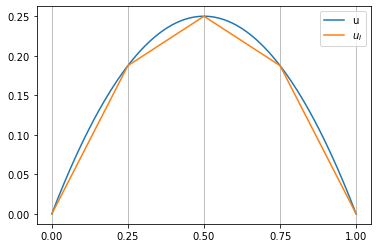

In [9]:
def u(x):
    return x * (1 - x)

def uI_loc(x):
    out = np.zeros(np.shape(x))
    for e in range(1, n+1):
        out += u(xs[e-1])*Phi(psi0, e, x) + u(xs[e])*Phi(psi1, e, x)
    return out

plt.plot(xs_plot, u(xs_plot), label='u')
plt.plot(xs_plot, uI_loc(xs_plot), label='$u_I$')
plt.gca().set_xticks(xs)
plt.grid(axis='x')
plt.legend();

# Finite element method

Consider the local basis functions $\psi_{j,e}$, $j=0,1$, $e=1,\dots,n$, for the mesh 

$$
0 = x_0 < x_1 < \dots < x_n = 1.
$$ 

The corresponding global basis functions, with vanishing boundary conditions, are defined by 

## Definition: global basis functions
>
>$$
\phi_i(x) = \psi_{1,i}(x) + \psi_{0,i+1}(x), \quad i = 1,\dots,n-1.
$$

For $u$ satisfying $u(0) = 0 = u(1)$ there holds

$$
u_I(x) = \sum_{i=1}^{n-1} u(x_i) \phi_i(x).
$$

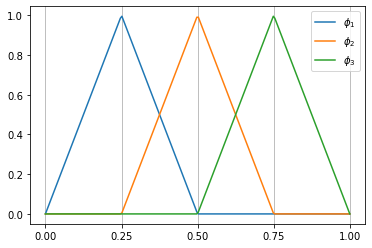

In [10]:
def phi(i, x):
    return Phi(psi1, i, x) + Phi(psi0, i+1, x)

for i in range(1, n):
    plt.plot(xs_plot, phi(i, xs_plot), label=f'$\phi_{i}$')
plt.gca().set_xticks(xs)
plt.grid(axis='x')
plt.legend();

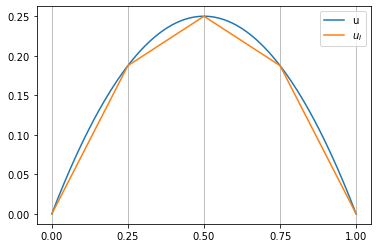

In [11]:
def uI_glob(x):
    out = np.zeros(np.shape(x))
    for i in range(1, n):
        out += u(xs[i]) * phi(i, x)
    return out

plt.plot(xs_plot, u(xs_plot), label='u')
plt.plot(xs_plot, uI_glob(xs_plot), label='$u_I$')
plt.gca().set_xticks(xs)
plt.grid(axis='x')
plt.legend();

We define the finite element space $S$ as the linear span of the global basis functions $\phi_i$, $i=1,\dots,n-1$. Note that $\phi_i(0) = \phi_i(1) = 0$
and $\phi_i \in C(0,1)$ for all $i$. However, $\phi_i \notin C^1(0,1)$
and therefore $\phi_i$ is not in the space 

$$
\mathcal V = \{ v \in C^1(0,1) : v(0) = v(1) = 0 \}
$$

that we used earlier. We will define a weaker notion of derivative so that $\phi_i$ is differentiable in this weak sense. Letting $V$ to be the space of weakly differentiable functions on $[0,1]$, with vanishing boundary conditions, 
we will show that $S$ is a subspace of $V$ and that 

$$
a(u, v) = (u', v'), \quad a : V \times V \to \mathbb R
$$

is an inner product on $V$. Here prime stands now for the weak derivative. (For differentiable functions, the weak derivative is the usual derivative, so this notation will not cause trouble.)

The abstract error estimate for the Galerkin solution holds for the spaces $S$ and $V$. 
We can turn the abstract error estimate into a concrete one as follows. Write $\|\cdot\|$ for the norm in $L^2(0,1)$ and suppose that $u \in V \cap C^2(0,1)$ satisfies

$$
a(u, v) = L(v) \quad \text{for all $v \in V$}.
$$

Then, using the fact that the weak derivative of $u_I$ is in $L^2(0,1)$,

\begin{align*}
\|(h\partial)(u-u_S)\|
&= 
h\|u-u_S\|_E 
= 
h \min_{v \in S}\|u-v\|_E
\le 
\|(h\partial)(u-u_I)\|
\\&\le
\max_{i=1,\dots,n}\|(h\partial)(u - u_I)\|_{L^\infty(x_{i-1}, x_i)} 
\le C \|(h \partial)^2 u\|_{L^\infty(0,1)}.
\end{align*}

It is possible to show stronger estimates, and we will return to this once we have defined and studied weak derivatives. 

# Implementation

We define again

$$
u_S = \sum_{j=1}^{n-1} U_j \phi_j, 
\quad
K_{ij} = a(\phi_i, \phi_j),
\quad
F_i = L(\phi_i), 
\qquad i,j=1,\dots,n-1,
$$

and write $U$ and $F$ for the vectors with elements $U_i$ and $F_i$, and $K$ for the matrix with elements $K_{ij}$.
Then the equation for the Galerkin solution 

$$
a(u_S,v) = L(v) \quad \text{for all $v \in S$}.
$$

is equivalent with $K U = F$.

Let us assemble the matrix $K$. As the global basis functions $\phi_j$ are defined piecewisely on intervals $I_e$, we will consider each interval separately. On $I_e$ there holds

$$
\phi_e(x) = \psi_1^e(x), \quad \phi_{e-1}(x) = \psi_0^e(x), \quad \phi_i(x) = 0, \quad i \ne e, e-1.
$$

Differentiating the local basis functions on $I_e$, we get 

$$
\phi_e'(x) = \frac{1}{x_e - x_{e-1}}, \quad \phi_{e-1}'(x) =  \frac{-1}{x_e - x_{e-1}}, \quad \phi_i'(x) = 0, \quad i \ne e, e-1.
$$

In order handle the first and last interval in the same way as the rest, we introduce the auxiliary basis functions

$$
\phi_0(x) = \psi_{0,1}(x), \quad \phi_n(x) = \psi_{1,n}(x).
$$

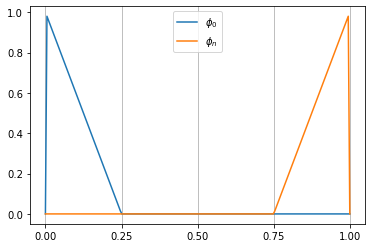

In [12]:
plt.plot(xs_plot, Phi(psi0, 1, xs_plot), label=f'$\phi_0$')
plt.plot(xs_plot, Phi(psi1, n, xs_plot), label=f'$\phi_n$')
plt.gca().set_xticks(xs)
plt.grid(axis='x')
plt.legend();

In [13]:
def assemble_K_demo(x):
    n = np.size(x) - 1
    K = np.zeros((n+1, n+1))
    for e in range(1, n+1):
        dx = x[e] - x[e-1]        # length of the interval I_e
        dphis = [-1 / dx, 1 / dx] # phi_j' for j=e-1 and j=e 
        ix = [e - 1, e]           # indices of K that are affected by I_e
        for i in range(2):
            for j in range(2):
                K[ix[i], ix[j]] += dphis[i] * dphis[j] * dx
    return K 

K = assemble_K_demo(xs)
# Condense K, that is, 
# throw away the values corresponding to the auxiliary functions
K = K[1:-1,1:-1]
print(K)

[[ 8. -4.  0.]
 [-4.  8. -4.]
 [ 0. -4.  8.]]


We turn to assembly of the vector $F$ and assume that the linear map $L$ is given by the inner product $L(v) = (f, v)$ with a function $f$. Then we need to evaluate the integrals $(f, \phi_j)$ numerically. Let us use the trapezium rule separately on each interval $I_e$:

$$
\int_{I_e} f(x) \phi_e(x) dx \approx \frac{x_e - x_{e-1}}{2} f(x_e),
\quad
\int_{I_e} f(x) \phi_{e-1}(x) dx \approx \frac{x_e - x_{e-1}}{2} f(x_{e-1}),
$$

and

$$
\int_{I_e} f(x) \phi_{j}(x) dx = 0, \quad j\ne e, e-1.
$$

In [14]:
def assemble_F_demo(x, f):
    n = np.size(x) - 1
    F = np.zeros(n+1)
    for e in range(1, n+1):
        dx = x[e] - x[e-1] 
        F[e]   += dx / 2 * f(x[e])
        F[e-1] += dx / 2 * f(x[e-1])
    return F

def f(x):
    return 1

F = assemble_F_demo(xs, f)
# Condense F
F = F[1:-1] 
print(F)

[0.25 0.25 0.25]


## Example: Poisson's equation in 1d with unit load

Let us solve the problem

$$
\begin{cases}
-u'' = 1 & \text{on $(0,1)$},
\\
u(0) = 0 = u(1).
\end{cases}
$$

In [15]:
def assemble_poisson_demo(xs):
    K = assemble_K_demo(xs)
    K = K[1:-1,1:-1]
    F = assemble_F_demo(xs, f)
    F = F[1:-1] 
    return K, F

def solve_poisson_demo(xs):
    K, F = assemble_poisson_demo(xs)
    u = np.zeros(np.size(xs))
    u[1:-1] = la.solve(K, F)
    return u

The solution vector `u` contains the coefficients of the Galerkin solution $u_S$ in the global basis $\phi_0, \dots, \phi_n$.
Observe that the global basis functions satisfy 

$$
\phi_j(x_k) = \delta_{jk} = \begin{cases}
1 & j=k,
\\
0 & \text{otherwise}.
\end{cases}
$$

Hence we can interpret the coefficients `u` as the point values of $u_S$ at the nodes $x_j$, $j=0,\dots,n$.

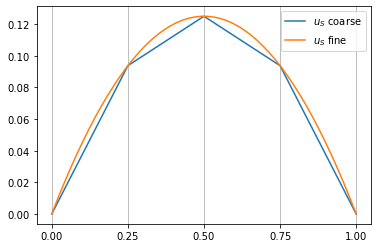

In [16]:
plt.plot(xs, solve_poisson_demo(xs), label='$u_S$ coarse')
xs_fine = np.linspace(0,1)
plt.plot(xs_fine, solve_poisson_demo(xs_fine), label='$u_S$ fine')
plt.gca().set_xticks(xs)
plt.grid(axis='x')
plt.legend();

# Sparsity

Most of the elements of $K$ vanish, that is, $K$ is [sparse](https://en.wikipedia.org/wiki/Sparse_matrix). (In fact, in this particular case, $K$ is [tridiagonal](https://en.wikipedia.org/wiki/Tridiagonal_matrix).)
Solving the system $KU = F$ is typically the most costly part of the finite element method, and efficiency of the method boils down to this system being sparse.

In [17]:
K, F = assemble_poisson_demo(xs_fine)
K

array([[ 98., -49.,   0., ...,   0.,   0.,   0.],
       [-49.,  98., -49., ...,   0.,   0.,   0.],
       [  0., -49.,  98., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  98., -49.,   0.],
       [  0.,   0.,   0., ..., -49.,  98., -49.],
       [  0.,   0.,   0., ...,   0., -49.,  98.]])

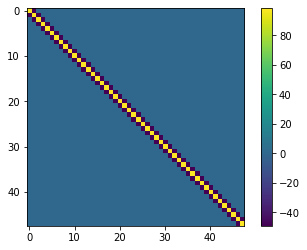

In [18]:
plt.imshow(K)
plt.colorbar();

We could (and should) reimplement `assemble_K_demo` using the [sparse matrix package](https://docs.scipy.org/doc/scipy/reference/sparse.html) of SciPy.

# Implementation using Scikit-fem

Let us now assemble the linear system for the same problem by using the Scikit-fem package.

In [19]:
import skfem as fem
from skfem.helpers import dot, grad # helpers make forms look nice

In [20]:
@fem.BilinearForm
def a(u, v, w):
    # Return the integrand in the bilinear form a(u, v)
    # using a notation that works in all dimensions
    return dot(grad(u), grad(v)) 

@fem.LinearForm
def L(v, w):
    x = w.x[0] # quadrature points for numerical integration
    # Return the integrand in the linear form L(v) 
    return f(x) * v # use the same f as before

def assemble_poisson(xs):    
    mesh = fem.MeshLine(xs) 
    basis = fem.Basis(mesh, fem.ElementLineP1())
    K = a.assemble(basis)
    F = L.assemble(basis)
    # Empty call to get_dofs() matches all boundary degrees-of-freedom
    boundary_dofs = basis.get_dofs()
    K, F, _, _ = fem.condense(K, F, D=boundary_dofs)
    return K, F

In [21]:
K, F = assemble_poisson(xs)
# K is a sparse matrix, convert it to a standard matrix
print(K.toarray())  
print(F)

[[ 8. -4.  0.]
 [-4.  8. -4.]
 [ 0. -4.  8.]]
[0.25 0.25 0.25]


We get the same linear system as before. Let's check that this is also the case when we use a finer mesh.

In [22]:
K1, F1 = assemble_poisson_demo(xs_fine)
K2, F2 = assemble_poisson(xs_fine)
print(la.norm(K1 - K2))
print(la.norm(F1 - F2))

0.0
0.0


We can solve the Poisson problem in even briefer way using Scikit-fem.

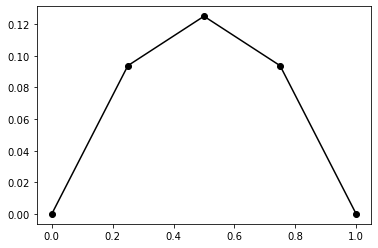

In [23]:
from skfem.models.poisson import laplace, unit_load
import skfem.visuals.matplotlib as fem_plt

mesh = fem.MeshLine(xs) 
basis = fem.Basis(mesh, fem.ElementLineP1())
K = laplace.assemble(basis)
F = unit_load.assemble(basis)
fem_plt.plot(mesh, fem.solve(*fem.condense(K, F, D=basis.get_dofs())));

# Computational study of convergence

Let $u$ solve the problem 

$$
\begin{cases}
-u'' = f & \text{on $(0,1)$},
\\
u(0) = 0 = u(1),
\end{cases}
$$

and consider the corresponding Galerkin solution $u_S$ computed in a mesh

$$
0 = x_0 < x_1 < \dots < x_n = 1.
$$ 

It is typical to think that $u_S$ is parametrized by the mesh constant

$$
h = \max_{e=1,\dots,n} |x_e - x_{e-1}|,
$$

and write $u_h = u_S$. 

We will study computationally how the error $u_h - u$ converges in the space $L^2(0,1)$.
In order to do this, we need to set up the problem so that we know the exact solution $u$.
A way to achieve this is to choose first $u$ satisfying the boundary conditions and then compute $f$.

We set 

$$
u(x) = \sin(\pi x).
$$

Then $u(0) = u(1) = 0$ and 

$$
-u''(x) = \pi^2 \sin(\pi x) =: f(x). 
$$

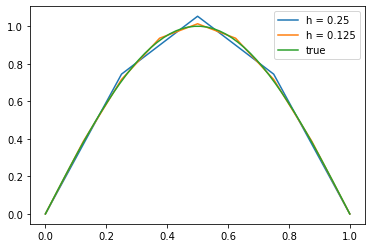

In [24]:
def u_exact(x):
    return np.sin(np.pi * x)

def f(x):
    return np.pi**2 * np.sin(np.pi * x)

# We need to redefine this, as we didn't parametrize f
def solve_poisson_demo(xs):
    K = assemble_K_demo(xs)
    K = K[1:-1,1:-1]
    F = assemble_F_demo(xs, f)
    F = F[1:-1] 
    u = np.zeros(np.size(xs))
    u[1:-1] = la.solve(K, F)
    return u

ns = [4, 8]
for n in ns:
    xs, h = np.linspace(0,1, n+1, retstep=True)
    u = solve_poisson_demo(xs)
    plt.plot(xs, u, label=f'{h = }')
xs_plot = np.linspace(0, 1)
plt.plot(xs_plot, u_exact(xs_plot), label='true')
plt.legend();

Recalling that on $I_e$

$$
\phi_e(x) = \psi_1^e(x), \quad \phi_{e-1}(x) = \psi_0^e(x), \quad \phi_i(x) = 0, \quad i \ne e, e-1,
$$

we have

$$
\|u_h - u\|^2 
= \sum_{e=1}^n \int_{I_e} |u_h(x) - u(x)|^2 dx
= \sum_{e=1}^n \int_{I_e} |U_{e} \psi_1^e(x) + U_{e-1} \psi_0^e(x) - u(x)|^2 dx.
$$

Evaluating the integral using the trapezium rule yields

$$
\int_{I_e} |U_{e} \psi_1^e(x) + U_{e-1} \psi_0^e(x) - u(x)|^2 dx
\approx \frac{x_e - x_{e-1}}{2} \left( |U_{e-1} - u(x_{e-1})|^2 + |U_{e} - u(x_{e})|^2 \right).
$$

In principle, we could expand the square and compute the terms

$$
U_i U_j \int_{I_e} \psi_1^i(x) \psi_0^j(x) dx, \quad i,j=e,e-1
$$

analytically. In practice, we can use a numerical integration method, that yields an exact result for polynomials of degree 2 or less, to achieve the same accuracy with the analytic computation. Here we will use the trapezium rule for simplicity. 

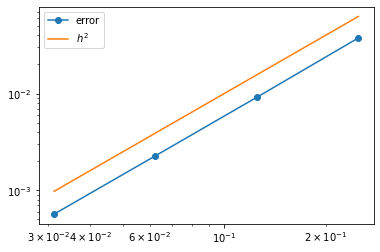

In [25]:
def error_sq_demo(x, u):
    '''Squared L2 error'''
    n = np.size(xs) - 1
    error = 0
    for e in range(1, n+1):
        dx = x[e] - x[e - 1]
        error += dx / 2 * ((u[e-1] - u_exact(x[e-1]))**2 + (u[e] - u_exact(x[e]))**2)
    return error

ns = [2**n for n in range(2,6)]
N = len(ns)
errs_demo = np.zeros(N)
hs = np.zeros(N)
for i in range(N):
    n = ns[i]
    xs, h = np.linspace(0,1, n+1, retstep=True)
    u = solve_poisson_demo(xs)
    hs[i] = h
    errs_demo[i] = np.sqrt(error_sq_demo(xs, u))

plt.loglog(hs, errs_demo, '-o', label='error')
plt.loglog(hs, hs**2, label='$h^2$')
plt.legend();

# Evaluation of error using Scikit-fem

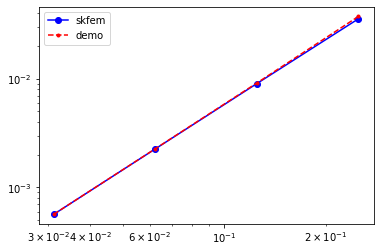

In [26]:
# We need to redefine this, as we didn't parametrize f
@fem.LinearForm
def L(v, w):
    x = w.x[0] # quadrature points for numerical integration
    # Return the integrand in the linear form L(v) 
    return f(x) * v 

@fem.Functional
def error_sq(w):
    x = w.x[0] 
    uh = w['uh'] # uh is given in the assemble call below
    # Return the integrand in the squared L2 error
    return (uh - u_exact(x))**2

def error_poisson(xs):    
    mesh = fem.MeshLine(xs) 
    basis = fem.Basis(mesh, fem.ElementLineP1())
    K = a.assemble(basis)
    F = L.assemble(basis)
    boundary_dofs = basis.get_dofs()
    u = fem.solve(*fem.condense(K, F, D=boundary_dofs))
    return np.sqrt(error_sq.assemble(basis, uh=basis.interpolate(u)))

errs = np.array([
    error_poisson(np.linspace(0,1, n+1)) for n in ns])

plt.loglog(hs, errs, 'ob-', label='skfem')
plt.loglog(hs, errs_demo, '.r--', label='demo')
plt.legend();

The two errors are slightly different since Scikit-fem is using more accurate numerical integration method than the trapezium rule. 

# Relation to finite difference method

TODO